# Pair Programming Estadística II
Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando ayer y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos
Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.
Se ruega a la hora de realizar la entrega que incluyáis el conjunto de datos que hayáis decidido emplear para estos ejercicios.

## 1.  Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
- Percentiles 25, 75
- Rango Intercualtílico
- Boxplot de algunas variables
- Tabla de frecuencias
- Variables cualitativas
- Variables cuantitativas
- Frecuencia acumulada
- Representación de al menos una tabla de frecuencias

In [1]:
import numpy as np
from scipy import stats # importando scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
df_risk = pd.read_csv("files/world_risk_index.csv", index_col=0)
df_risk.head(2)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
Region,,,,,,,,,,,
Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium


Homogenizamos los nombres de las columnas:

In [3]:
columnas_min = {col:col.lower().strip().replace(" ","_") for col in df_risk.columns}
df_risk.rename(columns = columnas_min, inplace=True)
df_risk.columns

Index(['wri', 'exposure', 'vulnerability', 'susceptibility',
       'lack_of_coping_capabilities', 'lack_of_adaptive_capacities', 'year',
       'exposure_category', 'wri_category', 'vulnerability_category',
       'susceptibility_category'],
      dtype='object')

### 1.1 Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

In [4]:
# Identificamos las variables numéricas:
df_risk.describe()

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1916.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090511,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.551156,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.192500,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.080000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.065000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [5]:
# Identificamos las variables categóricas:
df_risk.describe(include="object")

,exposure_category,wri_category,vulnerability_category,susceptibility_category
count,1917,1916,1913,1917
unique,5,5,5,5
top,Very Low,Very Low,Very Low,Very Low
freq,393,393,386,390


In [6]:
# Se crea una función para obtener los principales estadísticos:
def sacar_estadisticos_cuanti (df,col):
    media = df[col].mean()
    print(f"La media de {col} es {media}")
    print ("------------------------------------------")

    mediana = df[col].median()
    print(f"La mediana de {col} es {mediana}")
    print ("------------------------------------------")

    moda = df[col].mode()
    if len(moda) > 1:
        print(f""" {col} tiene {len(moda)} modas, las modas son: 
{moda}""")
        print ("------------------------------------------")  
    else:
        print(f"La moda de {col} es {moda[0]}")
        print ("------------------------------------------")

    minimo = df[col].min()
    print(f"El valor mínimo de {col} es {minimo}")
    print ("------------------------------------------")

    maximo = df[col].max()
    print(f"El valor máximo de {col} es {maximo}")
    print ("------------------------------------------")

In [7]:
sacar_estadisticos_cuanti(df_risk,"wri")

La media de wri es 7.551763171622318
------------------------------------------
La mediana de wri es 6.52
------------------------------------------
 wri tiene 2 modas, las modas son: 
0    3.46
1    3.56
Name: wri, dtype: float64
------------------------------------------
El valor mínimo de wri es 0.02
------------------------------------------
El valor máximo de wri es 56.71
------------------------------------------


In [8]:
sacar_estadisticos_cuanti(df_risk,"exposure")

La media de exposure es 15.388335941575347
------------------------------------------
La mediana de exposure es 12.76
------------------------------------------
La moda de exposure es 12.25
------------------------------------------
El valor mínimo de exposure es 0.05
------------------------------------------
El valor máximo de exposure es 99.88
------------------------------------------


In [9]:
sacar_estadisticos_cuanti(df_risk,"vulnerability")

La media de vulnerability es 48.07575899843497
------------------------------------------
La mediana de vulnerability es 47.1
------------------------------------------
La moda de vulnerability es 26.98
------------------------------------------
El valor mínimo de vulnerability es 14.31
------------------------------------------
El valor máximo de vulnerability es 76.47
------------------------------------------


In [10]:
sacar_estadisticos_cuanti(df_risk,"susceptibility")

La media de susceptibility es 30.739431403234263
------------------------------------------
La mediana de susceptibility es 25.4
------------------------------------------
La moda de susceptibility es 17.27
------------------------------------------
El valor mínimo de susceptibility es 8.26
------------------------------------------
El valor máximo de susceptibility es 70.83
------------------------------------------


In [11]:
sacar_estadisticos_cuanti(df_risk,"lack_of_coping_capabilities")

La media de lack_of_coping_capabilities es 70.4382889932186
------------------------------------------
La mediana de lack_of_coping_capabilities es 74.23
------------------------------------------
La moda de lack_of_coping_capabilities es 81.8
------------------------------------------
El valor mínimo de lack_of_coping_capabilities es 31.59
------------------------------------------
El valor máximo de lack_of_coping_capabilities es 94.36
------------------------------------------


In [12]:
sacar_estadisticos_cuanti(df_risk,"lack_of_adaptive_capacities")

La media de lack_of_adaptive_capacities es 43.090511482254705
------------------------------------------
La mediana de lack_of_adaptive_capacities es 43.08
------------------------------------------
 lack_of_adaptive_capacities tiene 4 modas, las modas son: 
0    34.10
1    38.17
2    50.40
3    57.80
Name: lack_of_adaptive_capacities, dtype: float64
------------------------------------------
El valor mínimo de lack_of_adaptive_capacities es 11.16
------------------------------------------
El valor máximo de lack_of_adaptive_capacities es 76.11
------------------------------------------


### 1.2 Percentiles y rango intercualtílico
- Percentiles 25,75
- Rango Intercuartílico

In [13]:
# Creamos una función para obtener la infomación deseada por columna
def sacar_percentiles(df,col):
    percentil25 = np.nanpercentile (df[col], 25)
    print(f"El percentil 25 de {col} es {percentil25}")
    print ("------------------------------------------")

    percentil50 = np.nanpercentile (df[col], 50)
    print(f"El percentil 50 de {col} es {percentil50}")
    print ("------------------------------------------")

    percentil75 = np.nanpercentile (df[col], 75)
    print(f"El percentil 75 de {col} es {percentil75}")
    print ("------------------------------------------")

    rango= percentil75 - percentil25
    print(f"El rango intercuartílico de {col} es {rango}")
    print ("------------------------------------------")

In [14]:
sacar_percentiles(df_risk,"wri")

El percentil 25 de wri es 3.74
------------------------------------------
El percentil 50 de wri es 6.52
------------------------------------------
El percentil 75 de wri es 9.4
------------------------------------------
El rango intercuartílico de wri es 5.66
------------------------------------------


In [15]:
sacar_percentiles(df_risk,"exposure")

El percentil 25 de exposure es 10.16
------------------------------------------
El percentil 50 de exposure es 12.76
------------------------------------------
El percentil 75 de exposure es 16.45
------------------------------------------
El rango intercuartílico de exposure es 6.289999999999999
------------------------------------------


In [16]:
sacar_percentiles(df_risk,"susceptibility")

El percentil 25 de susceptibility es 17.79
------------------------------------------
El percentil 50 de susceptibility es 25.4
------------------------------------------
El percentil 75 de susceptibility es 42.64
------------------------------------------
El rango intercuartílico de susceptibility es 24.85
------------------------------------------


El siguiente código nos permite sacar los etadísticos de todas variables numéricas,  pero dificulta la lectura de los resultados.

In [17]:
# for i in df_risk.describe():
    # sacar_percentiles(df_risk,i)

### 1.3 - Boxplot de algunas variables

In [18]:
# Creamos una función para crear un boxplot por columna deseada
def grafico_de_caja (df,col):
    plt.figure()

    plt.boxplot(x = df[col])

    return plt.show()

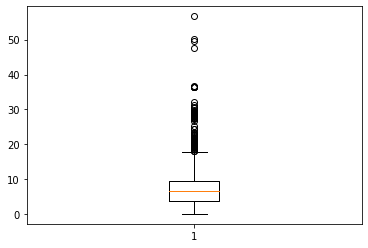

In [19]:
grafico_de_caja(df_risk,"wri")

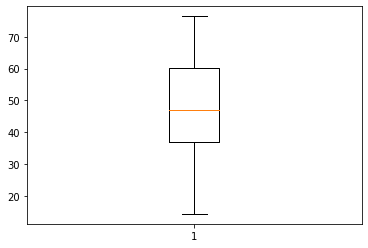

In [20]:
grafico_de_caja(df_risk,"vulnerability")

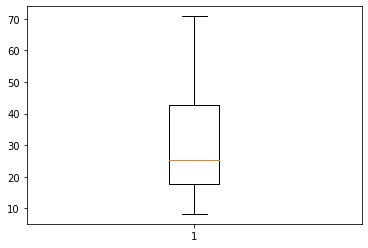

In [21]:
grafico_de_caja(df_risk,'susceptibility')

### 1.4 - Tabla de frecuencias
- Variables cualitativas
- Variables cuantitativas
- Frecuencia acumulada
- Representación de al menos una tabla de frecuencias

#### 1.4.1 - Variables cualitativas

In [22]:
# Identificamos las variables cualitativas
df_risk.describe(include="object")

,exposure_category,wri_category,vulnerability_category,susceptibility_category
count,1917,1916,1913,1917
unique,5,5,5,5
top,Very Low,Very Low,Very Low,Very Low
freq,393,393,386,390


In [23]:
# Creamos una función para generar una tabla de frecuencia absoluta
def frecuenciar_cuali (df,col):
    return df.groupby([col]).count().reset_index()

In [24]:
frecuenciar_cuali (df_risk,"exposure_category")

,exposure_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,wri_category,vulnerability_category,susceptibility_category
0,High,379,379,379,379,379,379,379,378,379,379
1,Low,381,381,381,381,381,381,381,381,379,381
2,Medium,381,381,381,381,381,381,381,381,380,381
3,Very High,383,383,383,383,383,382,383,383,382,383
4,Very Low,393,393,393,393,393,393,393,393,393,393


In [25]:
frecuenciar_cuali (df_risk,"wri_category")

,wri_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,vulnerability_category,susceptibility_category
0,High,378,378,378,378,378,378,378,378,378,378
1,Low,379,379,379,379,379,379,379,379,379,379
2,Medium,383,383,383,383,383,383,383,383,383,383
3,Very High,383,383,383,383,383,382,383,383,382,383
4,Very Low,393,393,393,393,393,393,393,393,390,393


In [26]:
frecuenciar_cuali (df_risk,"vulnerability_category")

,vulnerability_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,susceptibility_category
0,High,380,380,380,380,380,380,380,380,379,380
1,Low,381,381,381,381,381,381,381,381,381,381
2,Medium,384,384,384,384,384,384,384,384,384,384
3,Very High,382,382,382,382,382,382,382,382,382,382
4,Very Low,386,386,386,386,386,386,386,386,386,386


In [27]:
frecuenciar_cuali (df_risk,"susceptibility_category")

,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category
0,High,381,381,381,381,381,380,381,381,380,380
1,Low,381,381,381,381,381,381,381,381,381,381
2,Medium,382,382,382,382,382,382,382,382,382,382
3,Very High,383,383,383,383,383,383,383,383,383,383
4,Very Low,390,390,390,390,390,390,390,390,390,387


#### 1.4.2 - Variables cuantitativas

In [28]:
# Identificamos las variables cuantitativas
df_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
wri,1917.0,7.551763,5.553257,0.02,3.7400,6.52,9.400,56.71
exposure,1917.0,15.388336,10.240135,0.05,10.1600,12.76,16.450,99.88
vulnerability,1917.0,48.075759,13.835666,14.31,37.0400,47.10,60.060,76.47
susceptibility,1917.0,30.739431,15.667030,8.26,17.7900,25.40,42.640,70.83
lack_of_coping_capabilities,1917.0,70.438289,15.038854,31.59,59.3300,74.23,83.000,94.36
lack_of_adaptive_capacities,1916.0,43.090511,13.551156,11.16,33.1925,43.08,53.065,76.11
year,1917.0,2016.049557,3.182045,2011.00,2013.0000,2016.00,2019.000,2021.00


In [29]:
# Creamos una función para generar una tabla de frecuencia absoluta
def frecuenciar_cuanti (df,col):
    return df.groupby([col]).count().reset_index().sort_values(by = col, ascending = False)

In [30]:
frecuenciar_cuanti (df_risk,"wri")

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
1025,56.71,1,1,1,1,1,1,1,1,1,1
1024,50.28,1,1,1,1,1,1,1,1,1,1
1023,49.74,1,1,1,1,1,1,1,1,1,1
1022,47.73,1,1,1,1,1,1,1,1,1,1
1021,36.72,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4,0.30,1,1,1,1,1,1,1,1,1,1
3,0.10,2,2,2,2,2,2,2,2,2,2
2,0.09,1,1,1,1,1,1,1,1,1,1
1,0.08,3,3,3,3,3,3,3,3,3,3


In [31]:
frecuenciar_cuanti (df_risk,"exposure")

,exposure,wri,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
806,99.88,1,1,1,1,1,1,1,1,1,1
805,86.77,1,1,1,1,1,1,1,1,1,1
804,86.46,1,1,1,1,1,1,1,1,1,1
803,82.55,1,1,1,1,1,1,1,1,1,1
802,69.95,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4,0.91,1,1,1,1,1,1,1,1,1,1
3,0.90,1,1,1,1,1,1,1,1,1,1
2,0.85,1,1,1,1,1,1,1,1,1,1
1,0.28,6,6,6,6,6,6,6,6,6,6


#### 1.4.3 - Frecuencia relativa variables cuantitativas

In [32]:
# Creamos una función para generar una tabla de frecuencia relativa de las variables numérias
def frecuenciar_rela (df,col):
    return df.groupby([col]).count().reset_index()/df.shape[0]

In [33]:
frecuenciar_rela (df_risk,"susceptibility")

,susceptibility,wri,exposure,vulnerability,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,0.004309,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1,0.004340,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
2,0.004564,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
3,0.004679,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
4,0.004710,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
...,...,...,...,...,...,...,...,...,...,...,...
1495,0.036192,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1496,0.036515,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1497,0.036755,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1498,0.036787,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522


In [34]:
frecuenciar_rela (df_risk,"lack_of_adaptive_capacities")

,lack_of_adaptive_capacities,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,0.005822,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1,0.006437,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000000,0.000522
2,0.006573,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000000,0.000522
3,0.006599,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
4,0.006954,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.037856,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1595,0.037913,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1596,0.038367,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1597,0.038738,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522


#### 1.4.3 - Frecuencia acumulada absoluta variables numéricas

In [53]:
# Creamos una función para generar una tabla de frecuencia acumulada absoluta de las variables numéricas
def frecuenciar_cuanti_abs_acu (df,col):
    return df.groupby([col]).count().cumsum()

In [54]:
frecuenciar_cuanti_abs_acu (df_risk,"lack_of_adaptive_capacities")

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
lack_of_adaptive_capacities,,,,,,,,,,
11.16,1,1,1,1,1,1,1,1,1,1
12.34,2,2,2,2,2,2,2,2,1,2
12.60,3,3,3,3,3,3,3,3,1,3
12.65,4,4,4,4,4,4,4,4,2,4
13.33,5,5,5,5,5,5,5,5,3,5
...,...,...,...,...,...,...,...,...,...,...
72.57,1912,1912,1912,1912,1912,1912,1912,1911,1909,1912
72.68,1913,1913,1913,1913,1913,1913,1913,1912,1910,1913
73.55,1914,1914,1914,1914,1914,1914,1914,1913,1911,1914


#### 1.4.4 - Frecuencia acumulada relativa variables numéricas

In [37]:
def frecuenciar_cuanti_rela_acu (df,col):
    return df.groupby([col]).count().cumsum().reset_index()/df.shape[0]

In [38]:
frecuenciar_cuanti_rela_acu (df_risk,"lack_of_adaptive_capacities")

,lack_of_adaptive_capacities,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,0.005822,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522,0.000522
1,0.006437,0.001043,0.001043,0.001043,0.001043,0.001043,0.001043,0.001043,0.001043,0.000522,0.001043
2,0.006573,0.001565,0.001565,0.001565,0.001565,0.001565,0.001565,0.001565,0.001565,0.000522,0.001565
3,0.006599,0.002087,0.002087,0.002087,0.002087,0.002087,0.002087,0.002087,0.002087,0.001043,0.002087
4,0.006954,0.002608,0.002608,0.002608,0.002608,0.002608,0.002608,0.002608,0.002608,0.001565,0.002608
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.037856,0.997392,0.997392,0.997392,0.997392,0.997392,0.997392,0.997392,0.996870,0.995827,0.997392
1595,0.037913,0.997913,0.997913,0.997913,0.997913,0.997913,0.997913,0.997913,0.997392,0.996348,0.997913
1596,0.038367,0.998435,0.998435,0.998435,0.998435,0.998435,0.998435,0.998435,0.997913,0.996870,0.998435
1597,0.038738,0.998957,0.998957,0.998957,0.998957,0.998957,0.998957,0.998957,0.998435,0.997392,0.998957


### 1.4.5 Representación de al menos una tabla frecuencia

In [55]:
tabla = frecuenciar_rela (df_risk,"susceptibility")

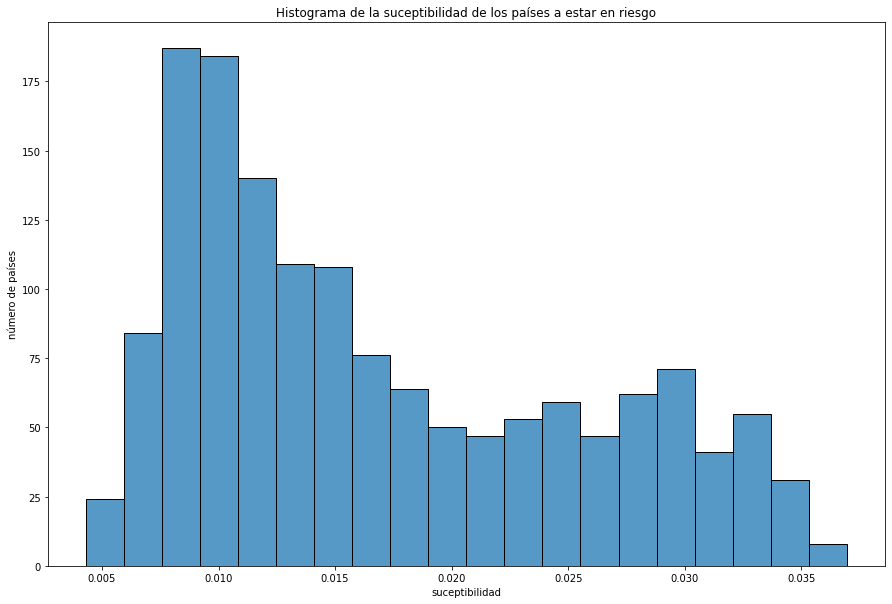

In [59]:
plt.figure(figsize = (15,10))

fig = sns.histplot( x= 'susceptibility', data = tabla, bins = 20)
fig.set(xlabel = 'suceptibilidad', ylabel = 'número de países')
fig.set_title('Histograma de la suceptibilidad de los países a estar en riesgo')

plt.show()

## 2. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

In [40]:
#Pendiente